# Introducción a Machine Learning: Parte 2
- Introducción a ML desde el punto de vista del Analista de Datos: Generar el mejor modelo posible para aplicar modelos de ML
- Conceptos básicos de datos de modelado y masajeo básico de datos de preparación
- Imputación de Datos
- Balanceo de Clases
- Desagregación de modelos en training y test
- Test simple de Regresión Logística
- Matriz de Confusión
- Principales Scores de un Modelo

## Antes de Empezar:
- Definir la(s) pregunta(s) a hacerse al modelo

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv(filepath_or_buffer='D:/Documentos/Documentos/DataAnalysis/ebac/Python/Modulo25/marketing_campaign.csv', sep=';')
df.sample(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2072,5517,1969,Graduation,Married,25293.0,1,0,2013-09-15,51,15,...,8,0,0,0,0,0,0,3,11,0
852,4856,1957,2n Cycle,Married,82347.0,0,0,2012-11-06,38,556,...,3,1,0,0,1,0,0,3,11,0
894,8800,1943,PhD,Divorced,48948.0,0,0,2013-02-01,53,437,...,6,1,0,0,0,0,0,3,11,1


## Field Engineering Básico - Visto en Módulo Anterior
- Eliminar la columna ID - no aporta valor
- Eliminar las columnas con solo un valor (como Z_Cosncontact y Z_Revenue)
- Eliminar las líneas con nulos de Income

In [3]:
df.drop(columns=['Z_Revenue', 'Z_CostContact', 'ID'], inplace=True)
df.sample(3)


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
14,1987,Graduation,Married,17323.0,0,0,2012-10-10,38,3,14,...,0,3,8,0,0,0,0,0,0,0
1709,1973,PhD,Married,54222.0,0,1,2014-03-01,98,199,12,...,3,5,3,0,0,0,0,0,0,0
727,1976,Master,Divorced,75012.0,0,0,2014-01-25,41,294,142,...,8,11,1,0,0,0,0,0,0,0


In [4]:
# Validar la cantidad de celdas que que son nulas 
print(f'Existen {df.isnull().sum().sum()} celdas nulas')

Existen 24 celdas nulas


In [5]:
print('Columnas que tienen valores nulos')
print('-------------------------------')

df.isnull().sum()

Columnas que tienen valores nulos
-------------------------------


Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

## Imputación de datos
- Qué es la imputación de datos? - Generar información donde no existe
- Pueden usarse medidas de tendencia: media, mediana, moda, en caso de ser una variable numérica
- En el caso categórico se puede usar la clasificación más usara, tambien poner "Otros" puede aplicar
- https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779
- https://en.wikipedia.org/wiki/Imputation_(statistics)


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

In [7]:
df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107
std,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.shape

(2240, 26)

In [9]:
df.nunique()

Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Response                  2
dtype: int64

### Insights
- Se valida con nunique() que ninguna columna tenga un solo valor único puesto que esa columna no agregaría valor al modelo
- Se debe imputar un valora a las celdas income del dataset que tienen NaN como valor. Se debería preguntar al negocio si esta variable el crucial, ya que tal vez podrían eliminarse. Se asume, para el caso, que se puede imputar el promedio total de Income del dataset

In [10]:
# Imputación de datos
# Reemplazar los registros de Income faltantes con el promedio general
avg_mean = df['Income'].mean()

df = df.replace(np.nan, avg_mean)

## Visualización Básica
### Análisis Univariado

In [11]:
df.dtypes

Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
dtype: object

C:\Users\USER\AppData\Local\Temp\ipykernel_11680\681163632.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = df.corr(method='pearson')


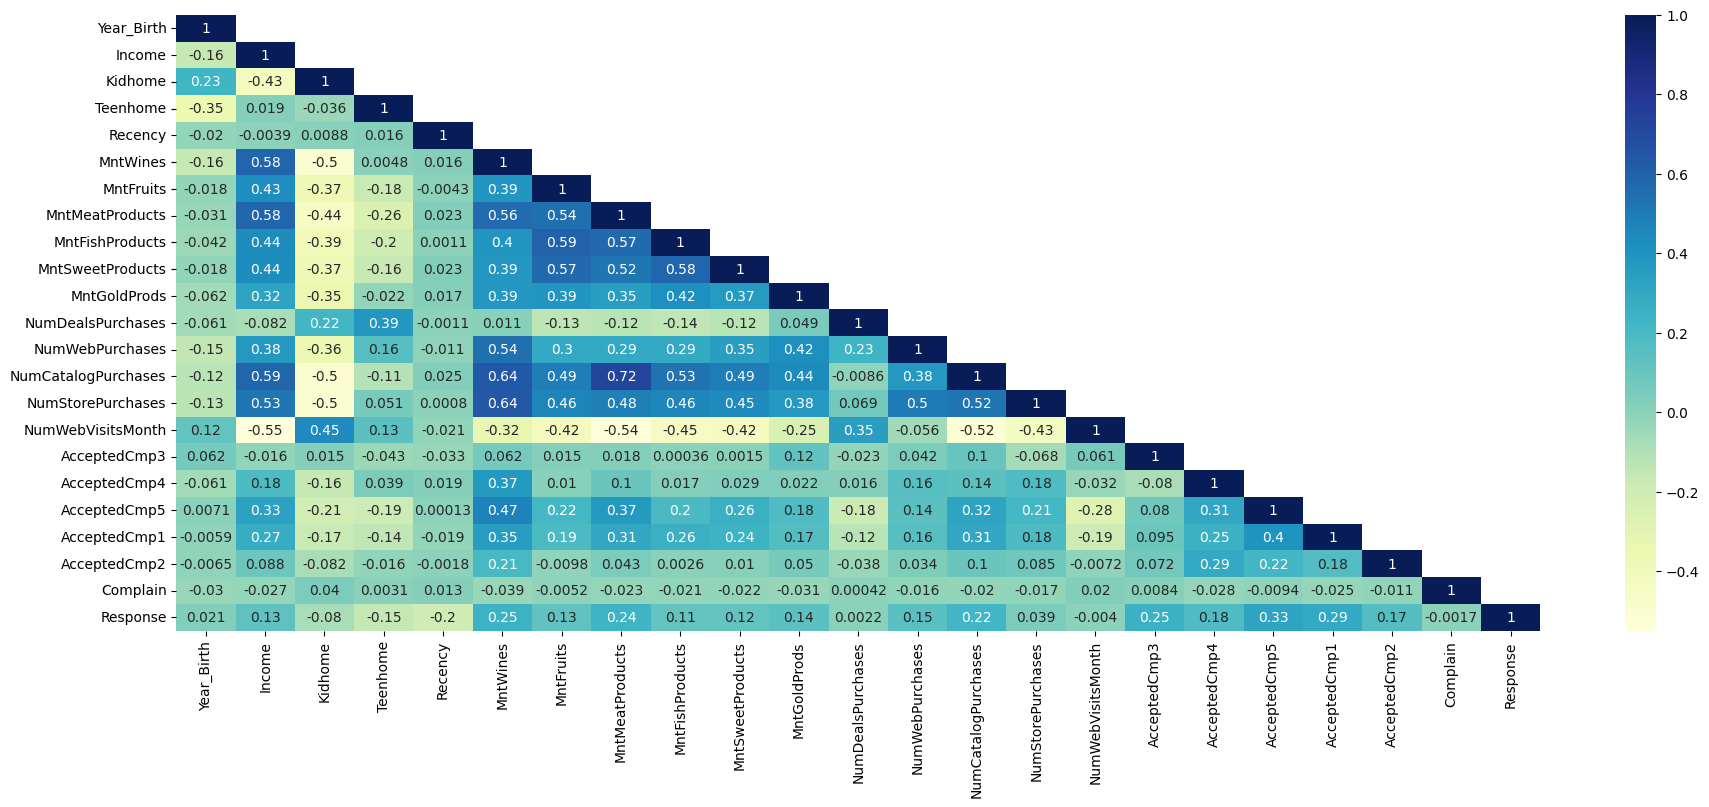

In [12]:
# Gráfica de correlación - Se hace para ver posiblidades de disminuir variables que tienen una correlación muy alta entre ellas puesto que esto denota multicolinealidad (generalmente tiene que tener aprox 0.9)
plt.figure(figsize=(22,8))
corr_df = df.corr(method='pearson')
df_lt = corr_df.where(np.tril(np.ones(corr_df.shape)).astype(bool))
hmap = sns.heatmap(df_lt, cmap='YlGnBu', annot=True)

In [13]:
# Visualiza las columnas y luyego seleccional las columnas numéricas
print('Lista compelta de columnas')
print(df.columns)
print(len(df.columns), ' columns')

# Numerical columns
cols_num = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
            'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
            'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
            'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']

Lista compelta de columnas
Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')
26  columns


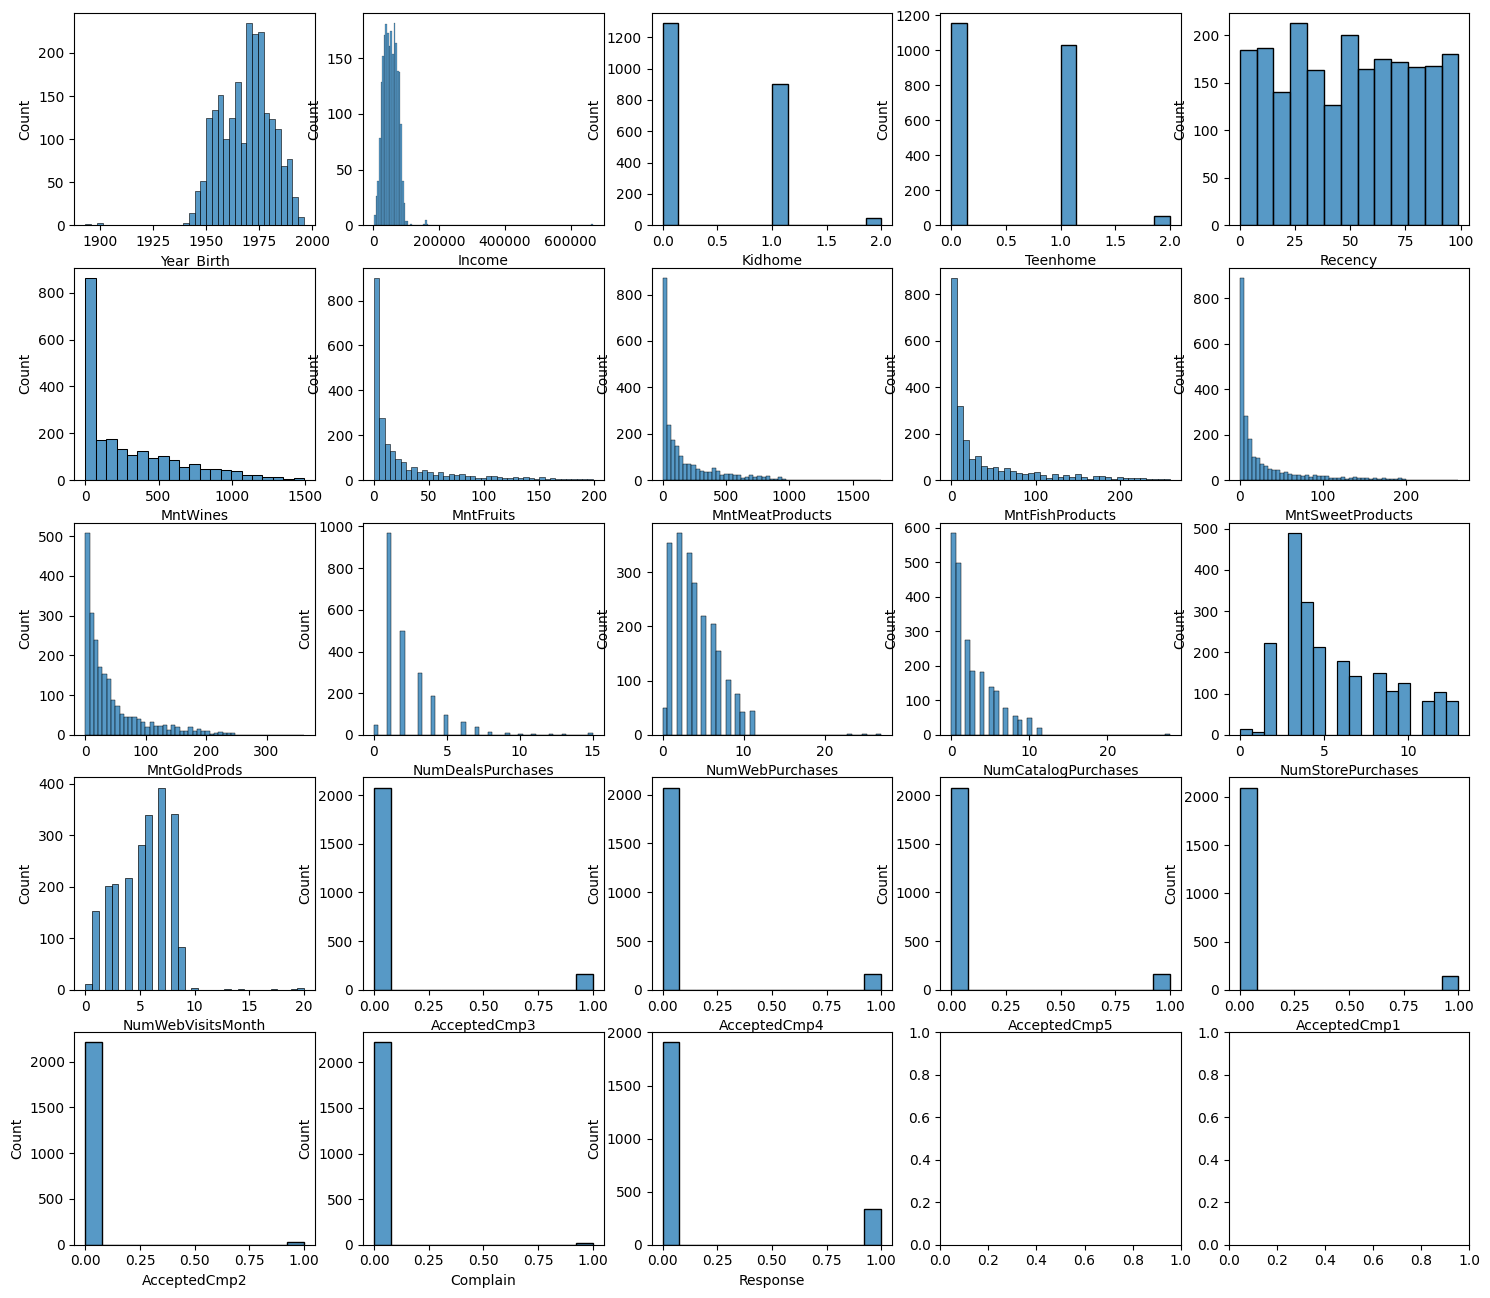

In [14]:
# Gráfica Exploratoria de todas las columnas (25)
fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(18,16))
for i, column in enumerate(cols_num):
    sns.histplot(df[column], ax=ax[i//5, i%5], kde=False)

### Análisis Bivariado


In [15]:
df.groupby(['Marital_Status']).mean().T

C:\Users\USER\AppData\Local\Temp\ipykernel_11680\2418297066.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Marital_Status']).mean().T


Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Year_Birth,1975.0,1973.000000,1966.275862,1969.579861,1971.489583,1967.746552,1958.558442,1973.0
Income,72365.5,43789.000000,52834.228448,51729.210370,51018.823463,53233.485792,56426.561706,48432.0
Kidhome,0.0,1.000000,0.413793,0.456019,0.464583,0.450000,0.233766,0.0
Teenhome,0.0,0.666667,0.590517,0.511574,0.406250,0.529310,0.636364,1.0
Recency,53.0,30.333333,49.487069,48.277778,49.506250,50.106897,49.142857,3.0
MntWines,355.5,184.666667,324.844828,299.480324,288.331250,306.825862,369.272727,322.0
MntFruits,84.5,4.000000,27.426724,25.734954,26.835417,25.350000,33.090909,3.0
MntMeatProducts,312.5,26.333333,150.206897,160.681713,182.108333,168.103448,189.285714,50.0
MntFishProducts,205.5,7.666667,35.043103,35.380787,38.216667,38.991379,51.389610,4.0
MntSweetProducts,30.5,7.000000,26.818966,26.701389,27.262500,26.122414,39.012987,3.0


In [16]:
# Generar una tabla pivote (crosstab) normalizado (% de total de la columna, de la fila o de la tabla completa)
pd.crosstab(df['Marital_Status'], df['Response'], normalize='index')        # Suma el 100% por fila

Response,0,1
Marital_Status,,
Absurd,0.500000,0.500000
Alone,0.666667,0.333333
Divorced,0.793103,0.206897
Married,0.886574,0.113426
Single,0.779167,0.220833
Together,0.896552,0.103448
Widow,0.753247,0.246753
YOLO,0.500000,0.500000


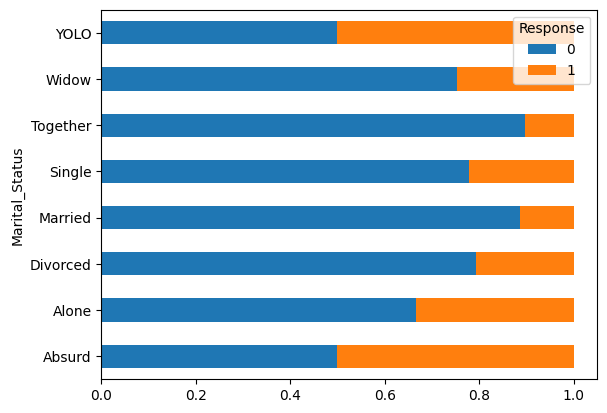

In [17]:
# Generar un gráfico de barras 100% a partir del crosstab
ct = pd.crosstab(df['Marital_Status'], df['Response'], normalize='index').plot.barh(stacked=True)

<AxesSubplot: ylabel='Marital_Status'>

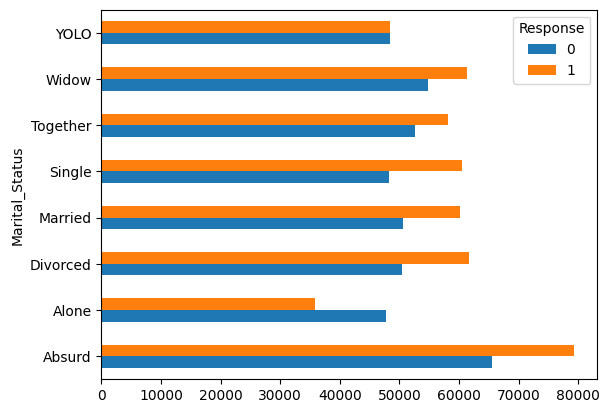

In [18]:
# Tambien se puede generar una operación de agregación dentro del crosstab
pd.crosstab(index=df['Marital_Status'], columns=df['Response'], values=df['Income'], aggfunc='mean').plot.barh(stacked=False)

## Balanceo de Clases
- Se cuentan las variables categóricas para ver su balance interno
- Si existen muy pocos valores para alguna categoría, se puede juntar con otra
- Generalmente, para que estén balanceadas las clases, deben tener al menos un 5% de representación

In [19]:
categ_columns = ['Marital_Status', 'Education', 'Response']
for column in categ_columns:
    print('\n' + column)
    print(df[column].value_counts())


Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

Response
0    1906
1     334
Name: Response, dtype: int64


### Insights
En este caso se puede ver que para Marital Status, las categorías Alone, Absurd y YOLO tienen muy pocos registros, probablemente tambien Widow no alcancé el 5% de los registros, por ende se pueden juntar. Para Education, Basic tampoco va a tener el 5% de registros

In [20]:
# Replace para cambiar las clases que se van a cambiar
df['Marital_Status'].replace(to_replace={'Widow': 'Other', 'Alone': 'Other', 'Absurd': 'Other', 'YOLO': 'Other'}, inplace=True)

In [21]:
categ_columns = ['Marital_Status']
for column in categ_columns:
    print(f'\n{column}')
    print(df[column].value_counts())


Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Other        84
Name: Marital_Status, dtype: int64


In [22]:
df.groupby(by=['Marital_Status']).median().T

C:\Users\USER\AppData\Local\Temp\ipykernel_11680\2687518442.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by=['Marital_Status']).median().T


Marital_Status,Divorced,Married,Other,Single,Together
Year_Birth,1968.0,1971.000000,1958.0,1972.0,1969.0
Income,52683.0,52247.251354,55453.5,49277.5,52137.0
Kidhome,0.0,0.000000,0.0,0.0,0.0
Teenhome,1.0,0.000000,1.0,0.0,1.0
Recency,51.0,48.000000,48.0,51.0,51.0
MntWines,182.5,173.000000,327.0,153.5,183.5
MntFruits,7.5,7.000000,10.0,9.0,8.0
MntMeatProducts,71.5,64.000000,83.0,65.0,68.0
MntFishProducts,10.0,12.000000,21.5,12.0,12.0
MntSweetProducts,7.0,8.000000,10.5,9.0,9.0


### Preparación Final antes del Split
- Eliminar columnas con alta correlación
- Generar clases para imbalances internos
- Eliminar ID 

In [23]:
# Generar una copia del dataset para las manipulaciones que se harán al prepararlo para el análisis de ML
df2 = df.copy()

In [24]:
# Cambiar las variables categóricas de tipo object a tipo category
df2['Education'] = df['Education'].astype('category')
df2['Marital_Status'] = df['Marital_Status'].astype('category')

# Esto ayuda a facilitar otros procesos mas adelante como la generación de variables dummy

In [25]:
# Transformación de variables numéricas con Sesgo
# En este caso se hace una transformación logarítmica
df2['MntWines-log'] = np.log(df2['MntWines']+1)
df2['MntFruits-log'] = np.log(df2['MntFruits']+1)
df2['MntMeatProducts-log'] = np.log(df2['MntMeatProducts']+1)
df2['MntFishProducts-log'] = np.log(df2['MntFishProducts']+1)
df2['MntSweetProducts-log'] = np.log(df2['MntSweetProducts']+1)
df2['NumDealsPurchases-log'] = np.log(df2['NumDealsPurchases']+1)
df2['NumWebPurchases-log'] = np.log(df2['NumWebPurchases']+1)
df2['NumCatalogPurchases-log'] = np.log(df2['NumCatalogPurchases']+1)

# Recuerda utilizar "+1" para evitar errores de log(0)

## Checklist de Preparación de DF para análisis de ML
- Balancear clases si es necesario
- Cambiar parseo de meses a números en caso de ser necesario ("Feb" -> 02)
- Imputación de datos 
- Cabiar columnas yes/no y true/false a 1/0
- Cambiar el tipo de datos object a category para casos de variables categóricas como Marital_Status

In [26]:
# Si las dimensiones de los campos son demasiado grandes, es ideal escalarlas

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df2['Income_Scale'] = StandardScaler().fit_transform(df2[['Income']])

# Este paso ayuda a que los modelos aprendan más rápido


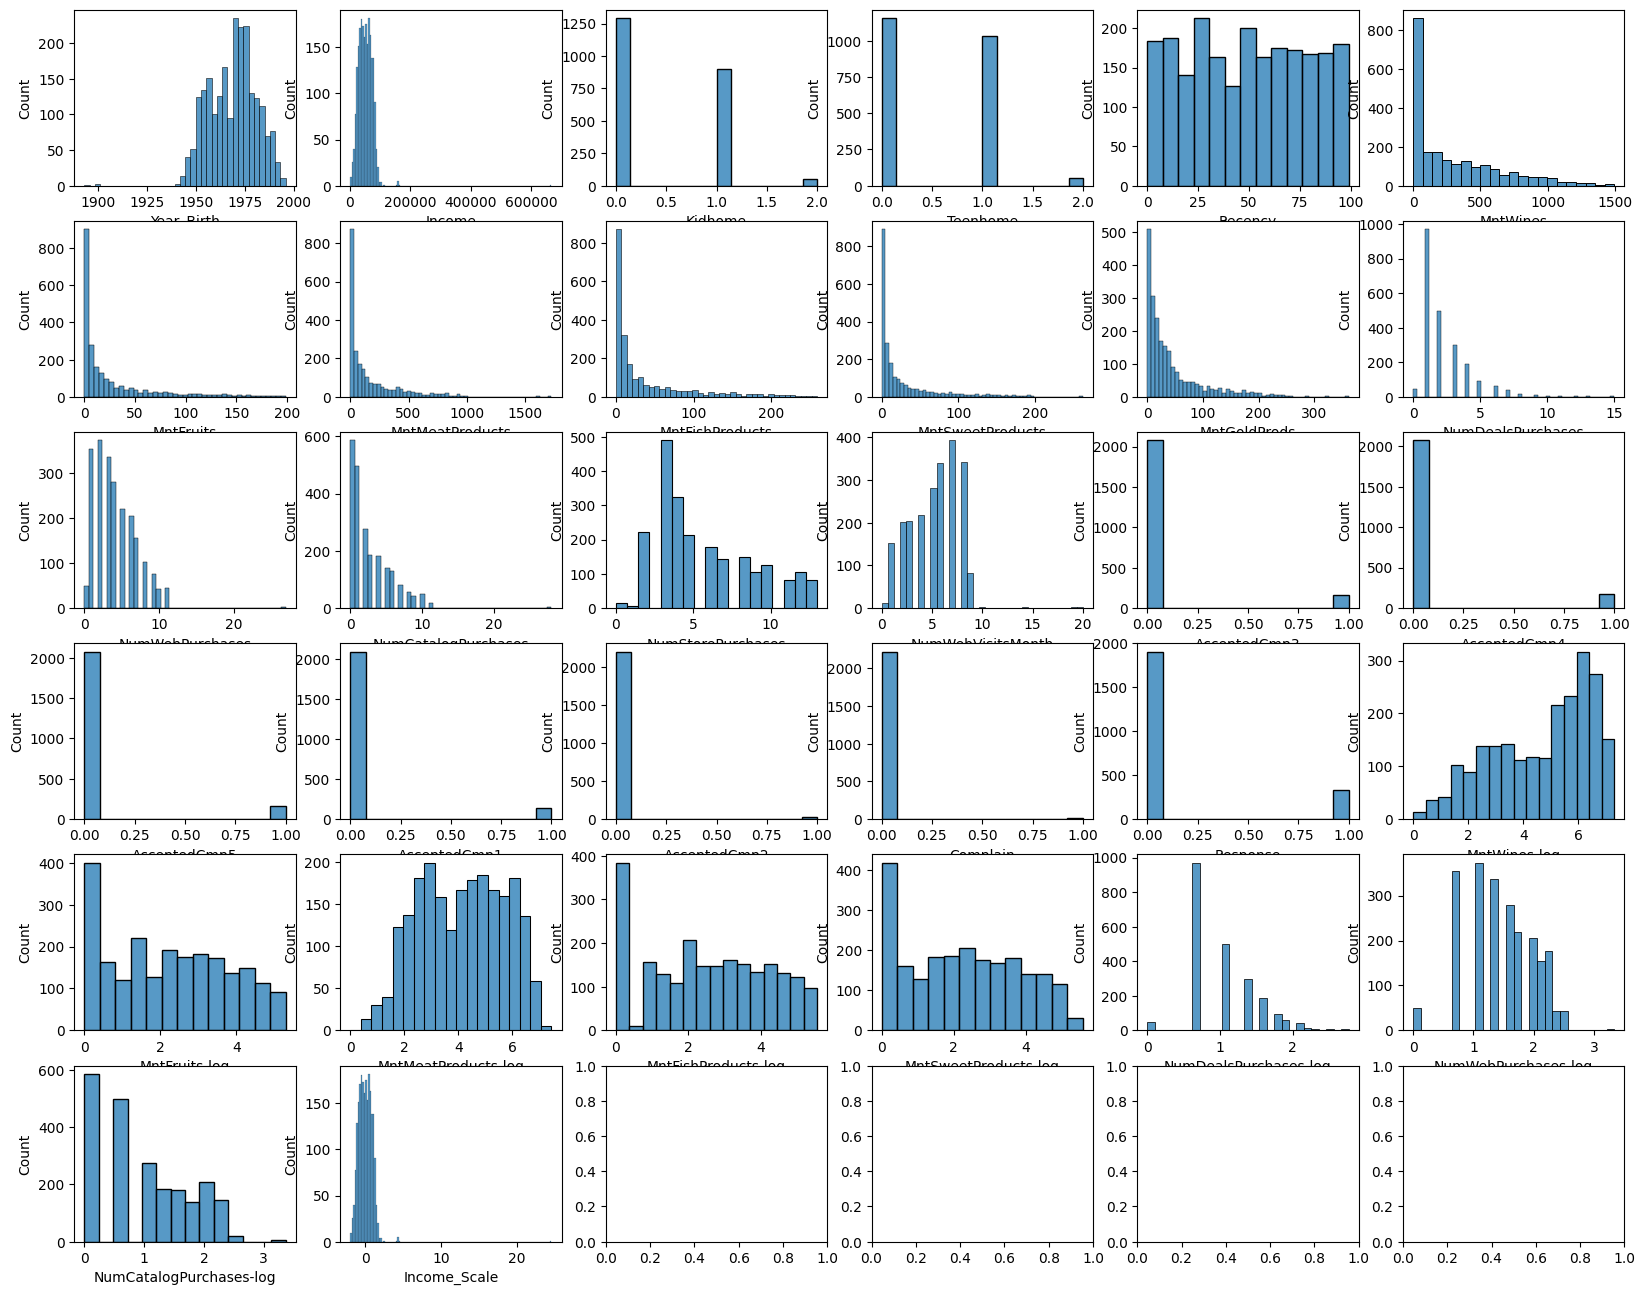

In [27]:
cols_num = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
            'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
            'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
            'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response',
            'MntWines-log', 'MntFruits-log', 'MntMeatProducts-log', 'MntFishProducts-log', 'MntSweetProducts-log', 'NumDealsPurchases-log',
            'NumWebPurchases-log', 'NumCatalogPurchases-log', 'Income_Scale']

# Gráfica Exploratoria de todas las columnas (25)
fig, ax = plt.subplots(nrows=6, ncols=6, figsize=(20,16))
for i, column in enumerate(cols_num):
    sns.histplot(df2[column], ax=ax[i//6, i%6], kde=False)

### Insights:
- Se muestra nuyevamente el gráfico de variables numéricas
- Ahora con los las variables transformadas de manera logarítimca y los cambios de datos
- Se puede ver como las variables transformadas están menos sesgadas
- Se ve además la variable Income_Scale que tiene su misma forma, pero en una escala mucha más compatible que la original
- **Muy importante** devinir si es que se van a dejar las vaiables en el dataset 2 o eliminar
---

## Data Split
Dividir el dataset en 70-30

In [28]:
from sklearn.model_selection import train_test_split

x = df2.drop(columns=['Response'])
y = df2['Response']

x = pd.get_dummies(x, drop_first=True)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=1)

In [29]:
print("Original Personal Loan True Values   : {0} ({1:0.2f}%)".format(len(df2.loc[df2['Response'] == 1]), (len(df2.loc[df2['Response'] == 1])/len(df2.index)) * 100 ))
print("Original Personal Loan False Values  : {0} ({1:0.2f}%)\n".format(len(df2.loc[df2['Response'] == 0]), (len(df2.loc[df2['Response'] == 0])/len(df2.index)) * 100 ))

print("Training Personal Loan True Values   : {0} ({1:0.2f}%)".format(len(y_train.loc[y_train[:] == 1]), (len(y_train.loc[y_train[:] == 1])/len(y_train.index)) * 100 ))
print("Training Personal Loan False Values  : {0} ({1:0.2f}%)".format(len(y_train.loc[y_train[:] == 0]), (len(y_train.loc[y_train[:] == 0])/len(y_train.index)) * 100 ))
print('The Training dataset contains {0:0.2f}% of the registers in the original dataset\n'.format( len(y_train[:]) / len(df2['Response']) * 100))

print("Testing Personal Loan True Values   : {0} ({1:0.2f}%)".format(len(y_test.loc[y_test[:] == 1]), (len(y_test.loc[y_test[:] == 1])/len(y_test.index)) * 100 ))
print("Testing Personal Loan False Values  : {0} ({1:0.2f}%)".format(len(y_test.loc[y_test[:] == 0]), (len(y_test.loc[y_test[:] == 0])/len(y_test.index)) * 100 ))
print('The Testing dataset contains {0:0.2f}% of the registers in the original dataset\n'.format( len(y_test[:]) / len(df2['Response']) * 100))

Original Personal Loan True Values   : 334 (14.91%)
Original Personal Loan False Values  : 1906 (85.09%)

Training Personal Loan True Values   : 226 (14.41%)
Training Personal Loan False Values  : 1342 (85.59%)
The Training dataset contains 70.00% of the registers in the original dataset

Testing Personal Loan True Values   : 108 (16.07%)
Testing Personal Loan False Values  : 564 (83.93%)
The Testing dataset contains 30.00% of the registers in the original dataset



## Regresión Logística
- Al ser respuestas 0 y 1, la regresión logística es el modelo que se utilizará para predecir la variable de respuesta
- Se usa la librería "LogisticRegression" para ejecutar la regresión
- Se debe tener en cuenta qeu el modelo hace fit con el set de Training (x_train, y_train) y luego el modelo hace la predicción con el modelo Test
- Revisión de tutoriales de Regresión Logística:
    - https://www.justintodata.com/logistic-regression-example-in-python/
    - https://www.analyticsvidhya.com/blog/2021/09/guide-for-building-an-end-to-end-logistic-regression-model/

In [30]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

# Adapta el modelo a los x_train y y_train (entrenamiento)
model = LogisticRegression(class_weight={0:0.15, 1:0.85}, solver='liblinear')
model.fit(x_train, y_train)

#Hace la predicción en x_test y guarda en y_predict
y_predict = model.predict(x_test)

In [31]:
# La predicción no es más que un conjunto de 0s y 1s que se aplican al mismo dataset
y_predict

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,

In [32]:
# Construye un dataset con el valor original y el de predicción
z = x_test.copy()
z['Real Response'] = y_test
z['Predicted Response'] = y_predict
z[['Real Response', 'Predicted Response']].head(10)

,Real Response,Predicted Response
779,0,0
389,0,0
510,0,1
1553,0,0
1172,0,1
1204,0,0
2057,0,1
1960,0,0
615,0,0
761,0,0


In [33]:
# BONUS
# Genera los coeficientes de la ecuación 
coef_df = pd.DataFrame(model.coef_)
coef_df.columns = x.columns

# Incluye el intercept
coef_df['intercept'] = model.intercept_
coef_df.T

,0
Year_Birth,-0.001878
Income,0.000012
Kidhome,0.299988
Teenhome,-0.889615
Recency,-0.028416
...,...
Dt_Customer_2014-06-26,-0.143480
Dt_Customer_2014-06-27,-0.040421
Dt_Customer_2014-06-28,-0.028917
Dt_Customer_2014-06-29,-0.044504


### Matriz de Confusión
- Entender Falsos Positiviso y Falsos Negativos
- Medidas de precisión del modelo

Text(0.5, 1.0, 'Matriz de Confusión')

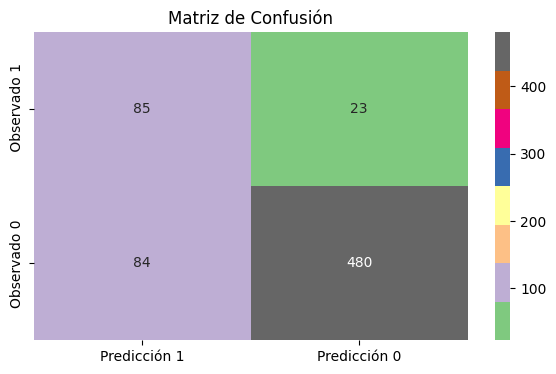

In [34]:
# Genera la matriz de confución
# La matriz de confución es la comparación de los valores observados y los valores predecidos. Se hace con el fin de saber qué tan preciso es el modelo
cm = metrics.confusion_matrix(y_true=y_test, y_pred=y_predict, labels=[1,0])

df_cm = pd.DataFrame(cm, index=[i for i in [' Observado 1', 'Observado 0']],
                     columns= [i for i in ['Predicción 1', 'Predicción 0']])

plt.figure(figsize=(7,4))
sns.heatmap(df_cm, annot=True, cmap='Accent', fmt='d').set_title('Matriz de Confusión')

In [35]:
# Medidas del modelo
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix

y_pred = model.predict(x_test)
model_score = accuracy_score(y_true=y_test, y_pred=y_pred)
recall_score = recall_score(y_true=y_test, y_pred=y_pred)
precision_score = precision_score(y_true=y_test, y_pred=y_pred)
f1_score = f1_score(y_true=y_test, y_pred=y_pred)

print('Medidas del modelo')
print('----------------------')
print('Accuracy = {0:0.2f}'.format(model_score))
print('Precision = {0:0.2f}'.format(precision_score))
print('Recall = {0:0.2f}'.format(recall_score))
print('F1 Score = {0:0.2f}'.format(f1_score))
print('Accuracy = {0:0.2f}'.format(roc_auc_score(y_test, y_pred)))


Medidas del modelo
----------------------
Accuracy = 0.84
Precision = 0.50
Recall = 0.79
F1 Score = 0.61
Accuracy = 0.82


#### Model Score
- Es la fracción de predicciones que el modelo predijo correctamente (Accuracy)
- Model Score = # Correcto de Predicciones / # Total de Predicciones
- Accuracy = (TP + TN) / (TP + TN + FP + FN)
- https://developers.google.com/machine-learning/crash-course/classification/accuracy?hl=es-419

#### Precisión
- Qué proporción de las predicciones positivas fueron correctas
- Precision = TP / (TP + FP)
- https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall?hl=es-419

#### Recall 
- Qué proporción de positivos reales fue identificada correctamente
- Recall = TP / (TP / FN)
- Así, un modelo que no tiene FN (False Negatives) tiene un recall de 1

#### F1 Score
- Derivado de Recall y Precision Scores, el F1-Score es la media armónica entre ambos
- Busca compensar valores muy altos entre ellos
- La media armónica no es más que el recíproco de la media aritmética
- F1 Score = 2*(Recall * Precision) / (Recall + Precision)

#### ROC (Receiver Operating Characteristic Curve)
- Curva que muestra qué tan bueno es un modelo (Accuracy) según sus umbrales de clasificación
- Así, la curva muestra dos parámetros
    1. El TPR (True Positive Rate = Recall) = TP / (TP / FN) - Eje Y
    2. El FPR (False Positive Rate) = FP / (FP + TN) - Eje X
- La curva ROC muestra en un scatter plot a ambas variables, según diferentes recorridos en sus valores
- Para calcular los puntos de la curva ROC se usa la técnica del AUC (Area under the curve) que mide el área debajo de la curva TPR vs FPR
- Así, el AUC genera un consolidado que mide le performance en todos los umbrales de clasificación. Una forma de verlo es la probablidad de que el modelo prediga una variable positiva correctamente que un número negativo. AUC tiene un rango de 0 a 1.
- https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc?hl=es-419

In [38]:
# Create a datafram with the prediction, y_hats
y_hats = pd.DataFrame(y_pred)

# Reset index for y_test
df_out = y_test.reset_index()
df_out['Actual'] = y_test.reset_index()['Response']
df_out['Prediction'] = y_hats.reset_index()[0]
df_out.drop(columns=['index'], inplace=True)

df_out = df_out[df_out['Actual'] != df_out['Prediction']]
print(len(df_out), 'registros donde lo observado <> observado')

107 registros donde lo observado <> observado


In [40]:
df_out

,Response,Actual,Prediction
2,0,0,1
4,0,0,1
6,0,0,1
23,1,1,0
49,0,0,1
...,...,...,...
636,0,0,1
648,0,0,1
656,0,0,1
657,0,0,1


### Wrap Up:
- Contunuamos con el análisis del módulo pasado
- Se agregó un modelo de regresión simple
- Matriz de confusión